In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga

In [2]:
def f_1(x_arr):
    x, y = x_arr
    r = (x-0.5)**2 + (y-0.5)**2
    n = 9
    s = 0.15
    return -1 * np.cos(n*np.pi*np.sqrt(r))**2 * np.exp(-r/s)

def f_2(x_arr):
    x, y = x_arr
    r_1 = (x-0.5)**2 + (y-0.5)**2
    r_2 = (x-0.6)**2 + (y-0.1)**2
    return -0.8*np.exp(-r_1/0.3**2) + 0.879008*np.exp(-r_2/0.03**2)
    

Function 1:
 The best solution found:                                                                           
 [0.4999635  0.50002799]

 Objective function:
 -0.9999982942244667


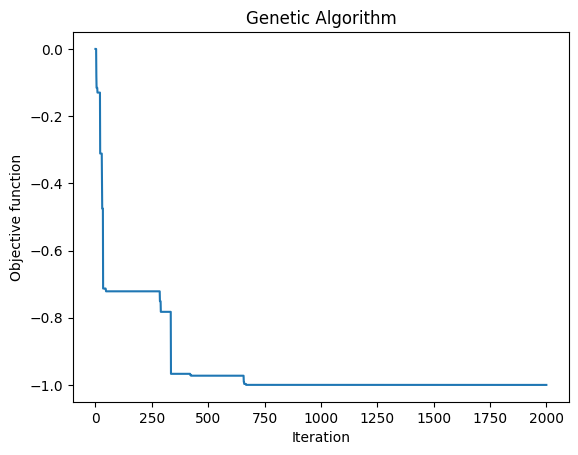

Function 2:
 The best solution found:                                                                           
 [0.50000189 0.50000092]

 Objective function:
 -0.7999999999605703


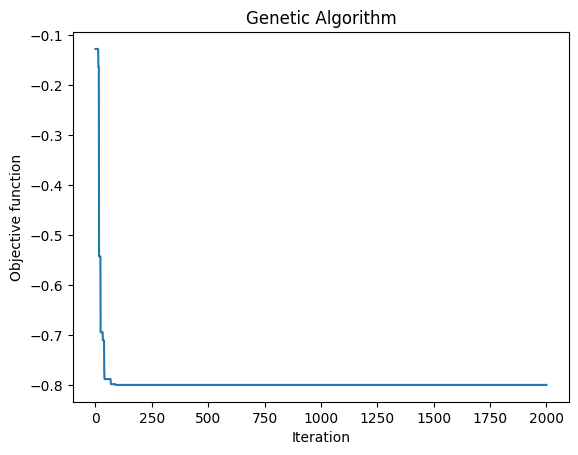

{'variable': array([0.4999635 , 0.50002799]), 'function': np.float64(-0.9999982942244667)}
{'variable': array([0.50000189, 0.50000092]), 'function': np.float64(-0.7999999999605703)}


In [3]:
varbound = np.array([[-10, 10]] * 2)

model_1 = ga(function=f_1, dimension=2, variable_type='real', variable_boundaries=varbound)
model_2 = ga(function=f_2, dimension=2, variable_type='real', variable_boundaries=varbound)


print("Function 1:")
model_1.run()
convergence_1 = model_1.report
solution_1 = model_1.output_dict

print("Function 2:")
model_2.run()
convergence_2 = model_2.report
solution_2 = model_2.output_dict

print(solution_1)
print(solution_2)

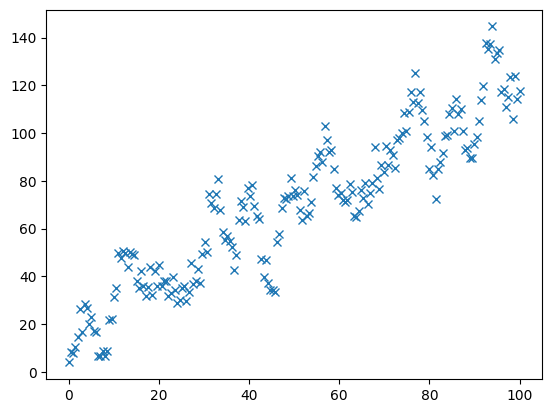

In [4]:
lichtkurve = np.loadtxt("lichtkurve.dat")
# print(lichtkurve.shape)
plt.plot(lichtkurve[:,0], lichtkurve[:,1], marker="x", linestyle="")
plt.show()

 The best solution found:                                                                           
 [1.14941682 9.993763  ]

 Objective function:
 55.33610521293994


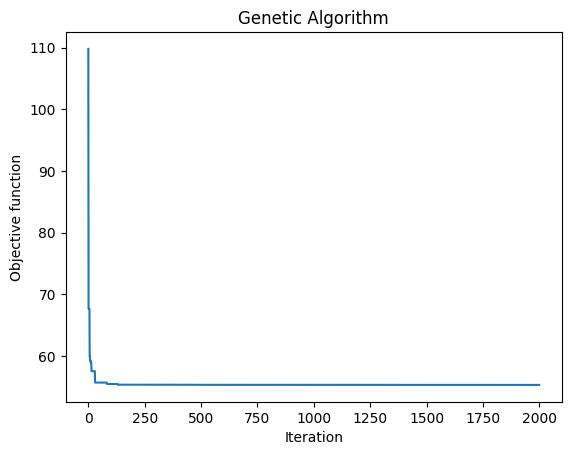

In [5]:
def linear(x, a, b):
    return a*x + b

def Xi_sq_linear(x):
    a,b = x
    frac = ((lichtkurve[:,1] - linear(lichtkurve[:,0], a, b))/5**2)**2
    return np.sum(frac)

lin_gen = ga(function=Xi_sq_linear, dimension=2, variable_type='real', variable_boundaries=varbound)

lin_gen.run()


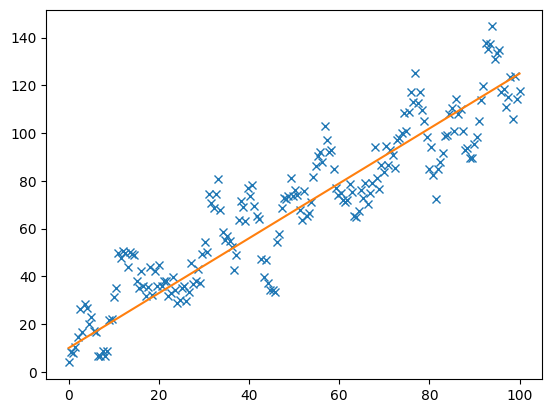

In [6]:
x = np.linspace(0,100, 1000)
plt.plot(lichtkurve[:,0], lichtkurve[:,1], marker="x", linestyle="")
plt.plot(x, linear(x, *lin_gen.output_dict["variable"]))

Fitting linear plus 1 sins...
 The best solution found:                                                                           
 [  1.04180859  17.1828595   15.07404367   7.9163633  -19.44916842]

 Objective function:
 51.16876569696399
Fitting linear plus 2 sins...
 The best solution found:                                                                           
 [  1.0422966   17.15857392   0.0355766  -23.34838733  20.33052375
  -7.89461983 -24.27011454  10.23925331]

 Objective function:
 51.16883701501745
Fitting linear plus 3 sins...
 The best solution found:                                                                           
 [  1.04193747  17.17677578  13.63519344  22.47290938  -7.59219494
   2.96645766  13.33482429 -18.67779908  14.55792348  -1.73789993
  23.46979329]

 Objective function:
 51.168772101128965
Fitting linear plus 4 sins...
 The best solution found:                                                                           
 [  1.04186443  17.1801064  

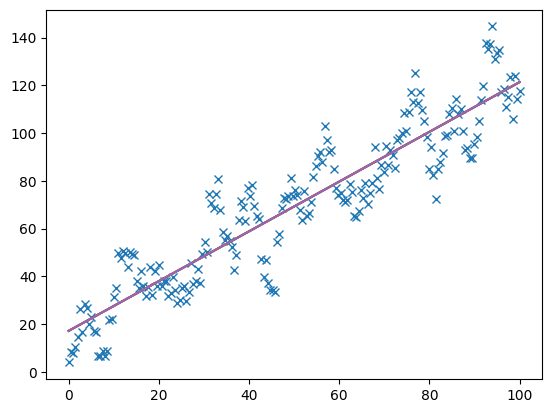

In [7]:
def func(x_1, N, parameters):
    res = parameters[0]*x_1 + parameters[1]
    for i in range(2,N-3,3):
        res += parameters[i]*np.sin(2*np.pi*(parameters[i+1] - parameters[i+3]))
    return res


plt.clf()
plt.plot(lichtkurve[:,0], lichtkurve[:,1], marker="x", linestyle="")


results = {}
for nr_sins in range(1,5):
    print(f"Fitting linear plus {nr_sins} sins...")
    def Xi_sq(x):
        frac = ((lichtkurve[:,1] - func(lichtkurve[:,0], nr_sins, x))/5**2)**2
        return np.sum(frac)
    
    bounds = np.array([[-25,25]]*(3*nr_sins+2))
    
    model = ga(function=Xi_sq, dimension=3*nr_sins+2, variable_type="real", variable_boundaries=bounds, progress_bar=True, convergence_curve=False)
    model.run()
    results[nr_sins] = model.output_dict
    plt.plot(x, func(x, nr_sins, results[nr_sins]["variable"]), label=f"{nr_sins = }")

